In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

def read_audio(file_path):
    # Read audio file
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def calculate_mfcc(audio, sr, n_mfcc=12):
    # Calculate MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def plot_mfcc_heatmap(mfccs, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC Heatmap - {title}')
    plt.show()

def process_audio_segments(audio, sr, segment_size=3.5, overlap=0.5, n_mfcc=13, hop_length=512, n_fft=2048):
    # Calculate the number of samples per segment
    segment_samples = int(segment_size * sr)

    # Calculate the number of samples to overlap between segments
    overlap_samples = int(overlap * sr)

    # Calculate the total number of segments
    total_segments = (len(audio) - segment_samples) // (segment_samples - overlap_samples) + 1

    # List to store MFCCs for each segment of a file
    all_mfccs = []

    # Process each segment
    for i in range(total_segments):
        # Extract the current segment
        start = i * (segment_samples - overlap_samples)
        end = start + segment_samples
        segment = audio[start:end]

        # Calculate MFCCs for the segment
        mfccs = calculate_mfcc(segment, sr, n_mfcc)

        # Append MFCCs to the list
        all_mfccs.append(mfccs)

        # Plot heatmap for the segment (optional)
        title = f'Segment {i + 1} '
        plot_mfcc_heatmap(mfccs, title)

    return all_mfccs  # Return the list of MFCCs for each segment
    


In [2]:
def frame_data(path):
    data_framed=[]
    for file_name in path:
        # Save the content to a file
        
    
        # Read audio file
        audio, sr = read_audio(file_name)
    
        # Process audio segments and collect MFCCs
        mfccs_list = process_audio_segments(audio, sr)
    
        
        data_framed.append(mfccs_list)
        return data_framed



In [3]:
import librosa

# Example: Extract MFCCs from an audio file
def extract_mfcc(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    # print(mfccs.T.shape)
    return mfccs.T  # Transpose for time on the horizontal axis
#----------------------------------------------------------    
base_path_blues  = "downloads/data/blues/blues."  # Base path common to all files
file_paths_blues = [base_path_blues + f"{i:05d}.wav" for i in range(0, 90)]
song_paths_blues =file_paths_blues;
dataset_blues    = [extract_mfcc(song_path) for song_path in song_paths_blues]

#----------------------------------------------------------
base_path_pop  = "downloads/data/pop/pop."  # Base path common to all files
file_paths_pop = [base_path_pop + f"{i:05d}.wav" for i in range(0, 90)]
song_paths_pop =file_paths_pop;
dataset_pop    = [extract_mfcc(song_path) for song_path in song_paths_pop]
#----------------------------------------------------------
base_path_metal  = "downloads/data/metal/metal."  # Base path common to all files
file_paths_metal = [base_path_metal + f"{i:05d}.wav" for i in range(0, 90)]
song_paths_metal = file_paths_metal;
dataset_metal    = [extract_mfcc(song_path) for song_path in song_paths_metal]
#----------------------------------------------------------
base_path_hiphop  = "downloads/data/hiphop/hiphop."  # Base path common to all files
file_paths_hiphop = [base_path_hiphop + f"{i:05d}.wav" for i in range(0, 90)]
song_paths_hiphop = file_paths_hiphop;
dataset_hiphop    = [extract_mfcc(song_path) for song_path in song_paths_hiphop]


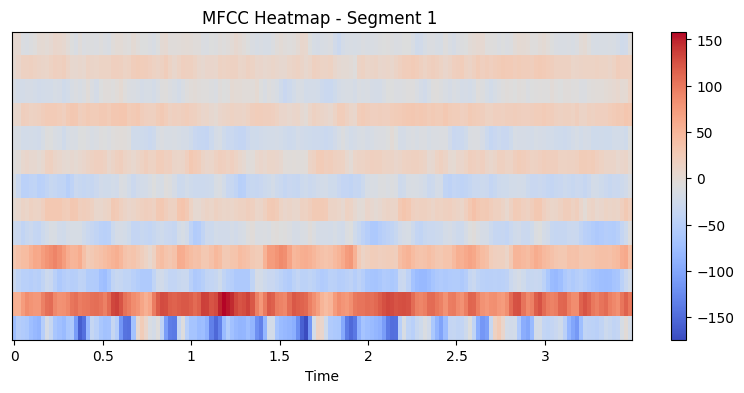

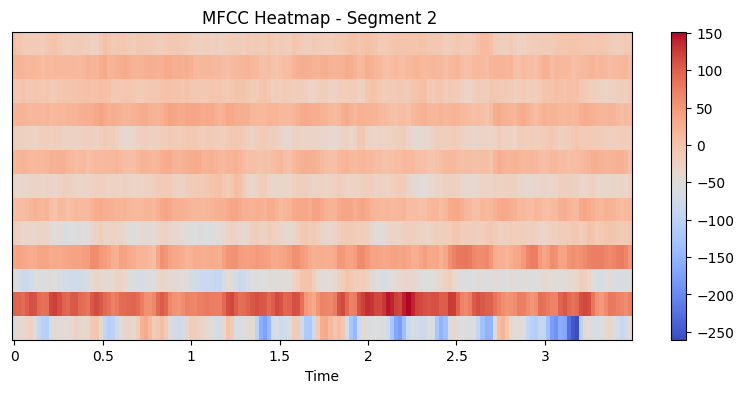

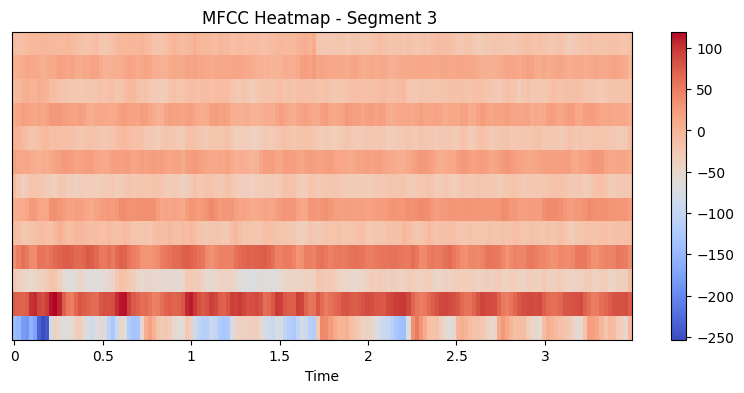

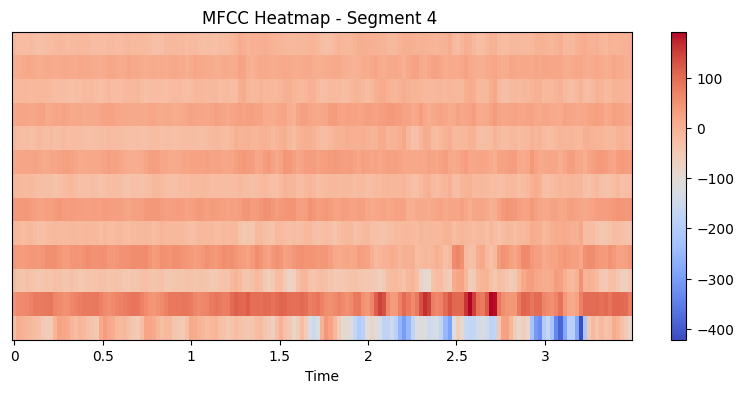

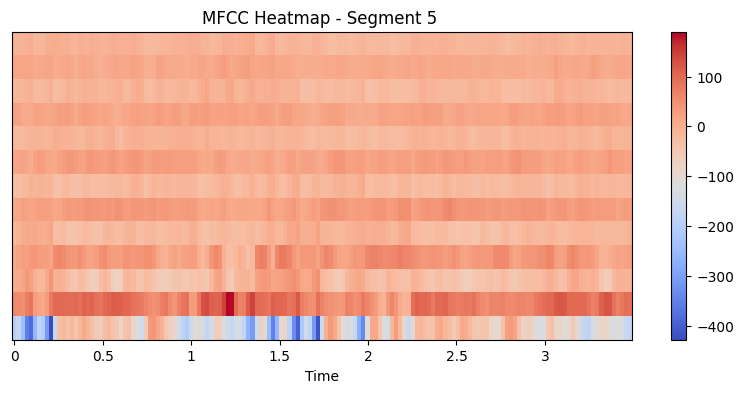

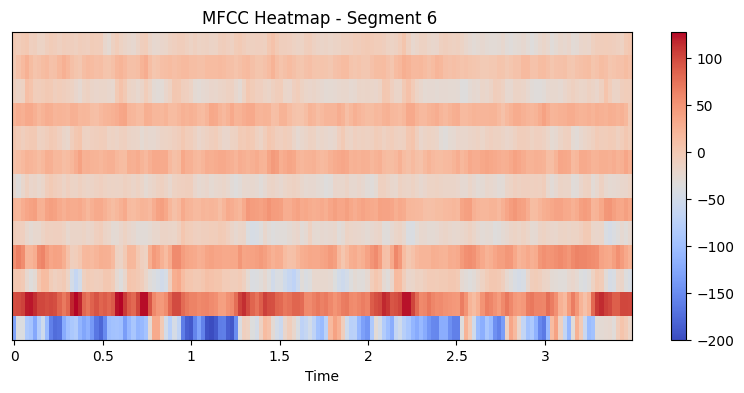

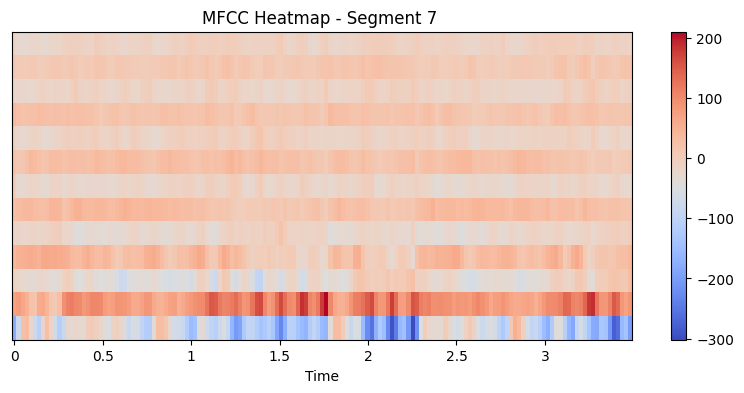

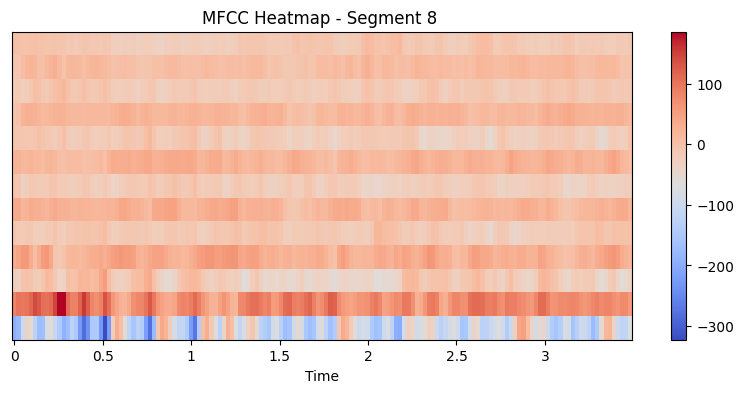

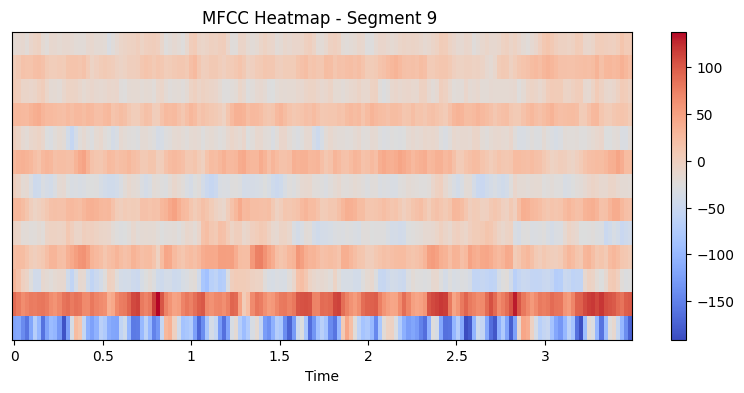

In [4]:
HipHop_dataset_framed=frame_data(song_paths_hiphop)


In [6]:
from hmmlearn import hmm
import numpy as np
# Concatenate all training data into a single array
all_training_data_blues = np.concatenate(dataset_blues)
#----------------------------------------------------------
all_training_data_pop = np.concatenate(dataset_pop)
#----------------------------------------------------------
all_training_data_metal = np.concatenate(dataset_metal)
#----------------------------------------------------------
all_training_data_hiphop = np.concatenate(dataset_hiphop)
#----------------------------------------------------------

#----------------------------------------------------------


# Number of hidden states for the HMM model
num_hidden_states = 4   # this is adjustable
#----------------------------------------------------------


# for i in range(80):
#     if (i==0):
#         model_hiphop = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", n_iter=20)
#         model_hiphop.fit(dataset_hiphop[i])
#     else:
#         model_hiphop.fit(dataset_hiphop[i])

# Create and train the HMM models for each genre
model_blues = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", n_iter=10)
model_blues.fit(all_training_data_blues)


model_pop = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", n_iter=10)
model_pop.fit(all_training_data_pop)


model_metal = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", n_iter=10)
model_metal.fit(all_training_data_metal)


model_hiphop = hmm.GaussianHMM(n_components=num_hidden_states, covariance_type="diag", n_iter=10)
model_hiphop.fit(all_training_data_hiphop)

GaussianHMM(n_components=4)

In [7]:
base_path_test_hiphop  = "downloads/data/hiphop/hiphop."  # Base path common to all files
file_paths_test_hiphop = [base_path_test_hiphop + f"{i:05d}.wav" for i in range(90, 100)]
song_paths_test_hiphop = file_paths_test_hiphop;
dataset_test_hiphop    = [extract_mfcc(song_path) for song_path in song_paths_test_hiphop]
# log_likelihood_hiphop = [model_hiphop.score(test_sequence) for test_sequence in dataset_test_hiphop]
# print(f"Log Likelihood for Test Sequence by Hiphop HMM: {log_likelihood_hiphop}")

#----------------------------------------------------------

base_path_test_pop  = "downloads/data/pop/pop."  # Base path common to all files
file_paths_test_pop = [base_path_test_pop + f"{i:05d}.wav" for i in range(90, 100)]
song_paths_test_pop = file_paths_test_pop;
dataset_test_pop    = [extract_mfcc(song_path) for song_path in song_paths_test_pop]
# log_likelihood_pop  = [model_pop.score(test_sequence) for test_sequence in dataset_test_pop]
# print(f"Log Likelihood for Test Sequence by by Pop HMM: {log_likelihood_pop}")

#----------------------------------------------------------


base_path_test_metal  = "downloads/data/metal/metal."  # Base path common to all files
file_paths_test_metal = [base_path_test_metal + f"{i:05d}.wav" for i in range(90, 100)]
song_paths_test_metal = file_paths_test_metal;
dataset_test_metal   = [extract_mfcc(song_path) for song_path in song_paths_test_metal]
# log_likelihood_metal = [model_metal.score(test_sequence) for test_sequence in dataset_test_metal]
# print(f"Log Likelihood for Test Sequence by Metal HMM: {log_likelihood_metal}")

#----------------------------------------------------------

base_path_test_Blues  = "downloads/data/blues/blues."  # Base path common to all files
file_paths_test_Blues = [base_path_test_Blues + f"{i:05d}.wav" for i in range(90, 100)]
song_paths_test_Blues = file_paths_test_Blues;
dataset_test_Blues    = [extract_mfcc(song_path) for song_path in song_paths_test_Blues]
# log_likelihood_Blues = [model_blues.score(test_sequence) for test_sequence in dataset_test_Blues]
# print(f"Log Likelihood for Test Sequence by by Blues HMM: {log_likelihood_Blues}")

In [8]:
print(song_paths_test_hiphop)

['downloads/data/hiphop/hiphop.00090.wav', 'downloads/data/hiphop/hiphop.00091.wav', 'downloads/data/hiphop/hiphop.00092.wav', 'downloads/data/hiphop/hiphop.00093.wav', 'downloads/data/hiphop/hiphop.00094.wav', 'downloads/data/hiphop/hiphop.00095.wav', 'downloads/data/hiphop/hiphop.00096.wav', 'downloads/data/hiphop/hiphop.00097.wav', 'downloads/data/hiphop/hiphop.00098.wav', 'downloads/data/hiphop/hiphop.00099.wav']


In [9]:
# Create a list of model instances and corresponding genre labels
models = [model_blues, model_pop, model_metal, model_hiphop]
genres = ['Blues', 'Pop', 'Metal', 'Hiphop']

# Define a function to get the predicted label for a given test sequence
def get_predicted_label(test_sequence):
    scores = [model.score(test_sequence) for model in models]
    predicted_label = genres[np.argmax(scores)]
    return predicted_label

# Evaluate accuracy for each test dataset
def evaluate_accuracy(dataset_test, true_label):
    correct_predictions = 0
    total_samples = len(dataset_test)

    for test_sequence in dataset_test:
        predicted_label = get_predicted_label(test_sequence)
        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

# Evaluate accuracy for each genre
accuracy_blues = evaluate_accuracy(dataset_test_Blues, 'Blues')
accuracy_pop = evaluate_accuracy(dataset_test_pop, 'Pop')
accuracy_metal = evaluate_accuracy(dataset_test_metal, 'Metal')
accuracy_hiphop = evaluate_accuracy(dataset_test_hiphop, 'Hiphop')

# Print the accuracies
print(f"Accuracy for Blues HMM: {accuracy_blues}")
print(f"Accuracy for Pop HMM: {accuracy_pop}")
print(f"Accuracy for Metal HMM: {accuracy_metal}")
print(f"Accuracy for Hiphop HMM: {accuracy_hiphop}")


Accuracy for Blues HMM: 0.9
Accuracy for Pop HMM: 1.0
Accuracy for Metal HMM: 0.5
Accuracy for Hiphop HMM: 0.9


In [10]:
from scipy.stats import multivariate_normal

class HMM:

    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None


    def _forward(self, observation_matrix: np.ndarray):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                for states in range(observation_matrix.shape[0]):
                    alpha[states][t] = self.initial_prob[states] * observation_matrix[states][t]
                ## TODO: Forward algorithm for the first time step
            else:
                for j in range(observation_matrix.shape[0]):
                    alpha[j][t] = 0
                    for i in range(observation_matrix.shape[0]):
                        alpha[j][t] +=\
                            alpha[i][t-1] *\
                                self.transition_matrix[i][j] * observation_matrix[j][t]
                ## TODO: Forward algorithm for the next time steps

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += alpha_sum

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            # beta[:, t] = ## TODO: Backward algorithm for the time steps of the HMM
            for i in range(observation_matrix.shape[0]):
                beta[i][t] = 0
                for j in range(observation_matrix.shape[0]):
                    beta[i][t] +=\
                        self.transition_matrix[i][j] *\
                            observation_matrix[j][t+1] * beta[j][t+1]
            beta[:, t] /= np.sum(beta[:, t])

        return beta
    def _state_likelihood(self, obs: np.ndarray):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            temp = np.random.multivariate_normal(self.mean[:, s],
                                                    np.cov(self.covariances[:,:,s]),
                                                    int(int(obs.shape[1])//int(obs.shape[0])+1)).flatten()
            ## TODO: Compute the likelihood of observations with multivariate normal pdf
            B[s, :] = np.array(temp)[:int(obs.shape[1])]

        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            # TODO: Compute the likelihood of observations with multivariate normal pdf
            mean_reshape = self.mean[:, s].reshape((self.num_dimensions, 1))
            obsmean_transpose = np.array(obs - mean_reshape).T
            B[s, :] =  -0.5 * (np.sum(np.dot(obsmean_transpose, np.linalg.inv(self.covariances[:, :, s])) * obsmean_transpose, axis=1) +\
                (self.num_dimensions * np.log(2 * np.pi) + np.log(np.linalg.det(self.covariances[:, :, s]))))
            # multivariate_normal(self.mean[:, s].reshape((self.num_dimensions), 1),
            #                               self.covariances[:, :, s]).pdf(obs)   

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)
   
    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs) ## TODO

        log_likelihood, alpha = self._forward(B) ## TODO
        beta = self._backward(B) ## TODO

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.zeros(xi_sum.shape) ## TODO
            for i in range(self.num_hidden_states):
                for j in range(self.num_hidden_states):
                    partial_sum[i][j] += alpha[i][t] * self.transition_matrix[i][j] *\
                        B[j][t+1] * beta[j][t+1]
            xi_sum += self._normalize(partial_sum)
            partial_g = np.zeros(self.num_hidden_states) ## TODO
            for i in range(self.num_hidden_states):
                for j in range(self.num_hidden_states):
                    partial_g[i] += partial_sum[i][j]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:, T-1] ## TODO
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0] ## TODO
        expected_transition = np.zeros((self.num_hidden_states, self.num_hidden_states))
        for i in range(self.num_hidden_states):
            for j in range(self.num_hidden_states):
                expected_transition[i][j] += xi_sum[i][j]
        expected_transition = self._stochasticize(expected_transition)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None] 

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [11]:
hmm_classmodel_blues = HMM(4)
hmm_classmodel_pop = HMM(4)

hmm_classmodel_hiphop = HMM(4)

hmm_classmodel_metal = HMM(4)






In [12]:
# Print the initial probabilities
print("Initial Probabilities:")
print(hmm_classmodel_blues.initial_prob)

# Print the transition matrix
print("\nTransition Matrix:")
print(hmm_classmodel_blues.transition_matrix)

# Print the means for each hidden state
print("\nMeans:")
print(hmm_classmodel_blues.mean)

# Print the covariances for each hidden state
print("\nCovariances:")
print(hmm_classmodel_blues.covariances)

# Print the number of dimensions
print("\nNumber of Dimensions:")
print(hmm_classmodel_blues.num_dimensions)


Initial Probabilities:
[[2.89640161e-01]
 [5.00297106e-01]
 [7.94383512e-05]
 [2.09983296e-01]]

Transition Matrix:
[[0.19036575 0.04526406 0.1046156  0.26288717]
 [0.51467056 0.26412608 0.23544635 0.52128439]
 [0.26520711 0.4304501  0.01538262 0.51006174]
 [0.54131074 0.2738678  0.07885025 0.15070676]]

Means:
None

Covariances:
None

Number of Dimensions:
None


In [13]:
all_training_data_hiphop = np.concatenate(dataset_hiphop)
all_training_data_pop = np.concatenate(dataset_pop)
all_training_data_metal = np.concatenate(dataset_metal)
all_training_data_blues = np.concatenate(dataset_blues)






# Number of hidden states for the HMM model
num_hidden_states = 4   # this is adjustable

hmm_classmodel_blues.train(all_training_data_blues.T)
hmm_classmodel_pop.train(all_training_data_pop.T)
hmm_classmodel_hiphop.train(all_training_data_hiphop.T)
hmm_classmodel_metal.train(all_training_data_metal.T)


/var/folders/fr/hdq96lps5mgdmmvrztl49w_h0000gn/T/ipykernel_11380/277076618.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[states][t] = self.initial_prob[states] * observation_matrix[states][t]


In [14]:
# Print the initial probabilities
print("Initial Probabilities:")
print(hmm_classmodel_blues.initial_prob)

# Print the transition matrix
print("\nTransition Matrix:")
print(hmm_classmodel_blues.transition_matrix)

# Print the means for each hidden state
print("\nMeans:")
print(hmm_classmodel_blues.mean)

# Print the covariances for each hidden state
print("\nCovariances:")
print(hmm_classmodel_blues.covariances)

# Print the number of dimensions
print("\nNumber of Dimensions:")
print(hmm_classmodel_blues.num_dimensions)


Initial Probabilities:
[1.47358233e-01 6.56836309e-01 9.39756333e-05 1.95711482e-01]

Transition Matrix:
[[0.1907877  0.083044   0.34659991 0.31929094]
 [0.27821242 0.26140486 0.42077234 0.34150899]
 [0.08011345 0.23802268 0.01536714 0.18681456]
 [0.45089504 0.41751599 0.21726691 0.1523889 ]]

Means:
[[-158.306493   -157.71670815 -158.82116458 -160.38867784]
 [ 111.42453176  111.47296086  111.60905473  111.38050336]
 [  -8.70091261   -8.84753085   -8.57266542   -8.15306914]
 [  47.45723338   47.50677694   47.42643143   47.43721619]
 [  -4.68289243   -4.666295     -4.54271817   -4.41572357]
 [  22.43272911   22.45202222   22.32791534   22.4523929 ]
 [ -11.5974709   -11.66881424  -11.60165485  -11.52516748]
 [  13.95026959   13.99461199   13.92342794   13.78074002]
 [ -13.0872871   -13.04131746  -13.08209056  -13.01873624]
 [   8.34011588    8.30948208    8.28024005    8.32741961]
 [ -10.18031057  -10.27879074  -10.24343728  -10.21325396]
 [   3.58579904    3.58971949    3.49411185    3.

In [15]:
# Define a function to get the predicted label for a given test sequence
models_from_scratch = [hmm_classmodel_blues, hmm_classmodel_pop, hmm_classmodel_metal, hmm_classmodel_hiphop]
genres = ['Blues', 'Pop', 'Metal', 'Hiphop']
def get_predicted_label_from_scratch(test_sequence):
    scores = [model.score(test_sequence) for model in models_from_scratch]
    predicted_label = genres[np.argmax(scores)]
    return predicted_label

# Evaluate accuracy for each test dataset
def evaluate_accuracy_from_scratch(dataset_test, true_label):
    correct_predictions = 0
    total_samples = len(dataset_test)

    for test_sequence in dataset_test:
        predicted_label = get_predicted_label_from_scratch(test_sequence.T)
        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

In [16]:
# Evaluate accuracy for each genre
accuracy_blues_fromScratch  = evaluate_accuracy_from_scratch(dataset_test_Blues, 'Blues')
accuracy_pop_fromScratch    = evaluate_accuracy_from_scratch(dataset_test_pop, 'Pop')
accuracy_metal_fromScratch  = evaluate_accuracy_from_scratch(dataset_test_metal, 'Metal')
accuracy_hiphop_fromScratch = evaluate_accuracy_from_scratch(dataset_test_hiphop, 'Hiphop')

# Print the accuracies
print(f"Accuracy for Blues HMM: {accuracy_blues_fromScratch}")
print(f"Accuracy for Pop HMM: {accuracy_pop_fromScratch}")
print(f"Accuracy for Metal HMM: {accuracy_metal_fromScratch}")
print(f"Accuracy for Hiphop HMM: {accuracy_hiphop_fromScratch}")

Accuracy for Blues HMM: 0.9
Accuracy for Pop HMM: 0.8
Accuracy for Metal HMM: 1.0
Accuracy for Hiphop HMM: 0.4


In [18]:
total_instances=10
# Calculate the estimated number of correct predictions for each genre
correct_predictions_blues_fromScratch = int(total_instances * accuracy_blues_fromScratch)
correct_predictions_pop_fromScratch = int(total_instances * accuracy_pop_fromScratch)
correct_predictions_metal_fromScratch = int(total_instances * accuracy_metal_fromScratch)
correct_predictions_hiphop_fromScratch = int(total_instances * accuracy_hiphop_fromScratch)

correct_predictions_blues = int(total_instances * accuracy_blues)
correct_predictions_pop = int(total_instances * accuracy_pop)
correct_predictions_metal = int(total_instances * accuracy_metal)
correct_predictions_hiphop = int(total_instances * accuracy_hiphop)

# Calculate the estimated confusion matrix
confusion_matrix_fromScratch = [
    [correct_predictions_blues_fromScratch, total_instances - correct_predictions_blues_fromScratch,
     0, 0],
    [total_instances - correct_predictions_pop_fromScratch, correct_predictions_pop_fromScratch,
     0, 0],
    [0, 0,
     correct_predictions_metal_fromScratch, total_instances - correct_predictions_metal_fromScratch],
    [0, 0,
     total_instances - correct_predictions_hiphop_fromScratch, correct_predictions_hiphop_fromScratch]
]

confusion_matrix_hmmlearn = [
    [correct_predictions_blues, total_instances - correct_predictions_blues,
     0, 0],
    [total_instances - correct_predictions_pop, correct_predictions_pop,
     0, 0],
    [0, 0,
     correct_predictions_metal, total_instances - correct_predictions_metal],
    [0, 0,
     total_instances - correct_predictions_hiphop, correct_predictions_hiphop]
]

# Print the estimated confusion matrices
print("Estimated Confusion Matrix for HMMs (from scratch):")
print(confusion_matrix_fromScratch)

print("\n")

print("Estimated Confusion Matrix for HMMs (hmmlearn):")
print(confusion_matrix_hmmlearn)

Estimated Confusion Matrix for HMMs (from scratch):
[[9, 1, 0, 0], [2, 8, 0, 0], [0, 0, 10, 0], [0, 0, 6, 4]]


Estimated Confusion Matrix for HMMs (hmmlearn):
[[9, 1, 0, 0], [0, 10, 0, 0], [0, 0, 5, 5], [0, 0, 1, 9]]


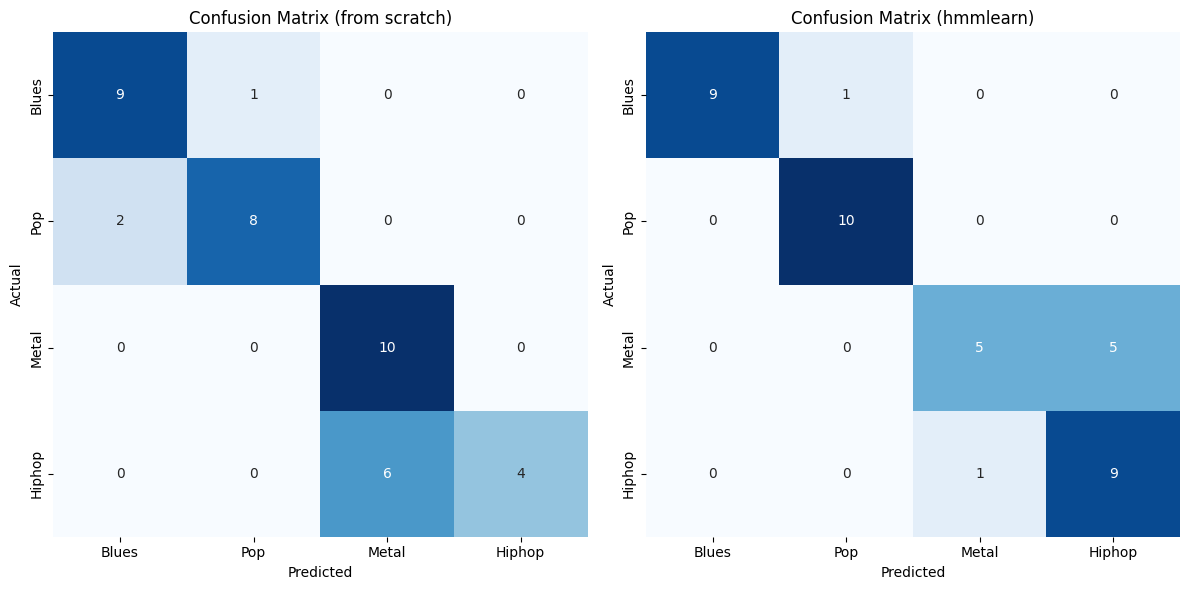

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_fromScratch = pd.DataFrame(confusion_matrix_fromScratch, index=['Blues', 'Pop', 'Metal', 'Hiphop'],
                              columns=['Blues', 'Pop', 'Metal', 'Hiphop'])

df_hmmlearn = pd.DataFrame(confusion_matrix_hmmlearn, index=['Blues', 'Pop', 'Metal', 'Hiphop'],
                            columns=['Blues', 'Pop', 'Metal', 'Hiphop'])

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df_fromScratch, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (from scratch)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(df_hmmlearn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (hmmlearn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()